In [4]:
!pip install seaborn

In [5]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Read in Air Quality data by county
aqi_county_2015_2020_df = pd.read_csv('resources\AQI_by_County\county_annual_aqi.csv')
display(aqi_county_2015_2020_df.shape)
display(aqi_county_2015_2020_df.head())

(6151, 18)

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
0,Alabama,Baldwin,2015,264,205,58,1,0,0,0,129,57,39,0,0,169,95,0
1,Alabama,Clay,2015,112,73,39,0,0,0,0,92,56,43,0,0,0,112,0
2,Alabama,Colbert,2015,280,221,59,0,0,0,0,76,56,39,0,0,179,101,0
3,Alabama,DeKalb,2015,363,294,68,1,0,0,0,101,55,38,0,0,284,79,0
4,Alabama,Elmore,2015,233,223,9,1,0,0,0,115,47,35,0,0,233,0,0


In [7]:
# Read in Air Quality data by State (Washington, New York, New Mexico)
aqi_WA_NY_NM_2015_2020_df = pd.read_csv('resources/AQI_by_State/aqi_WA_NY_NM_2015_2020.csv')
display(aqi_WA_NY_NM_2015_2020_df.shape)
display(aqi_WA_NY_NM_2015_2020_df.head())

(139, 56)

,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration_code,...,fiftieth_percentile,tenth_percentile,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
0,53,33,80,45201,6,47.568236,-122.308628,WGS84,Benzene,7,...,0.80,0.50,SEATTLE - BEACON HILL,4103 BEACON HILL S,Washington,King,Seattle,42660.0,"Seattle-Tacoma-Bellevue, WA",2020-05-21
1,53,33,80,45201,6,47.568236,-122.308628,WGS84,Benzene,7,...,0.79,0.41,SEATTLE - BEACON HILL,4103 BEACON HILL S,Washington,King,Seattle,42660.0,"Seattle-Tacoma-Bellevue, WA",2020-05-21
2,53,33,30,45201,6,47.597222,-122.319722,WGS84,Benzene,7,...,1.62,1.12,Seattle-10th & Weller,10th & Weller,Washington,King,Seattle,42660.0,"Seattle-Tacoma-Bellevue, WA",2020-05-21
3,53,33,34,45201,6,47.600833,-122.314444,NAD83,Benzene,7,...,1.36,0.92,Seattle-Yesler Way,1301 Yesler Way,Washington,King,Seattle,42660.0,"Seattle-Tacoma-Bellevue, WA",2020-05-21
4,53,33,35,45201,6,47.599444,-122.326111,NAD83,Benzene,7,...,1.51,0.99,Seattle-6th & Jackson,602 S Jackson St,Washington,King,Seattle,42660.0,"Seattle-Tacoma-Bellevue, WA",2020-05-21


In [8]:
# Read in Air Quality data by State (Washington, New York, Texas)
aqi_WA_NY_TX_2015_2020_df = pd.read_csv('resources/AQI_by_State/aqi_WA_NY_TX_2015_2020.csv')
display(aqi_WA_NY_TX_2015_2020_df.shape)
display(aqi_WA_NY_TX_2015_2020_df.head())

(237, 56)

,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration_code,...,fiftieth_percentile,tenth_percentile,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
0,53,33,80,45201,6,47.568236,-122.308628,WGS84,Benzene,7,...,0.80,0.50,SEATTLE - BEACON HILL,4103 BEACON HILL S,Washington,King,Seattle,42660.0,"Seattle-Tacoma-Bellevue, WA",2020-05-21
1,53,33,80,45201,6,47.568236,-122.308628,WGS84,Benzene,7,...,0.79,0.41,SEATTLE - BEACON HILL,4103 BEACON HILL S,Washington,King,Seattle,42660.0,"Seattle-Tacoma-Bellevue, WA",2020-05-21
2,53,33,30,45201,6,47.597222,-122.319722,WGS84,Benzene,7,...,1.62,1.12,Seattle-10th & Weller,10th & Weller,Washington,King,Seattle,42660.0,"Seattle-Tacoma-Bellevue, WA",2020-05-21
3,53,33,34,45201,6,47.600833,-122.314444,NAD83,Benzene,7,...,1.36,0.92,Seattle-Yesler Way,1301 Yesler Way,Washington,King,Seattle,42660.0,"Seattle-Tacoma-Bellevue, WA",2020-05-21
4,53,33,35,45201,6,47.599444,-122.326111,NAD83,Benzene,7,...,1.51,0.99,Seattle-6th & Jackson,602 S Jackson St,Washington,King,Seattle,42660.0,"Seattle-Tacoma-Bellevue, WA",2020-05-21


In [42]:
# Read in Global Health data concerning respitory illness
ihme_gbd_2010_2020_df = pd.read_csv('resources\IHME_ Data\IHME-GBD_2021_DATA-a408dab9-1.csv')
display(ihme_gbd_2010_2020_df.shape)
# Selecting the relevant years for the scope of this project
ihme_gbd_2015_2020_df = ihme_gbd_2010_2020_df[ihme_gbd_2010_2020_df['year'] >= 2015]
# Removing uneccesary information
ihme_gbd_2015_2020_df = ihme_gbd_2015_2020_df[ihme_gbd_2015_2020_df['location_name'] != 'Texas']
ihme_gbd_2015_2020_df = ihme_gbd_2015_2020_df.drop(columns=['location_id', 'cause_id', 'metric_id', 'upper', 'lower', 'age_id', 'sex_id', 'age_name'])
display(ihme_gbd_2015_2020_df.head())

(396, 16)

,measure_id,measure_name,location_name,sex_name,cause_name,metric_name,year,val
126,27,Probability of death,Washington,Male,Chronic respiratory diseases,Probability of death,2015,0.081303
127,27,Probability of death,Washington,Female,Chronic respiratory diseases,Probability of death,2015,0.083275
128,27,Probability of death,Washington,Both,Chronic respiratory diseases,Probability of death,2015,0.081966
129,27,Probability of death,Washington,Male,Pneumoconiosis,Probability of death,2015,0.000916
130,27,Probability of death,Washington,Female,Pneumoconiosis,Probability of death,2015,0.000034


In [27]:
# Display info on the AQI by county DataFrame
display(aqi_county_2015_2020_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6151 entries, 0 to 6150
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   State                                6151 non-null   object
 1   County                               6151 non-null   object
 2   Year                                 6151 non-null   int64 
 3   Days with AQI                        6151 non-null   int64 
 4   Good Days                            6151 non-null   int64 
 5   Moderate Days                        6151 non-null   int64 
 6   Unhealthy for Sensitive Groups Days  6151 non-null   int64 
 7   Unhealthy Days                       6151 non-null   int64 
 8   Very Unhealthy Days                  6151 non-null   int64 
 9   Hazardous Days                       6151 non-null   int64 
 10  Max AQI                              6151 non-null   int64 
 11  90th Percentile AQI                  6151 n

None

In [28]:
# Display info on the AQI by State DataFrame
# display(aqi_WA_NY_NM_2015_2020_df.info())
display(aqi_WA_NY_TX_2015_2020_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 56 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   state_code                   237 non-null    int64  
 1   county_code                  237 non-null    int64  
 2   site_number                  237 non-null    int64  
 3   parameter_code               237 non-null    int64  
 4   poc                          237 non-null    int64  
 5   latitude                     237 non-null    float64
 6   longitude                    237 non-null    float64
 7   datum                        237 non-null    object 
 8   parameter                    237 non-null    object 
 9   sample_duration_code         237 non-null    int64  
 10  sample_duration              237 non-null    object 
 11  pollutant_standard           0 non-null      float64
 12  metric_used                  237 non-null    object 
 13  method              

None

In [41]:
# Display info on the Global Health data concerning respitory illness
display(ihme_gbd_2015_2020_df.info())
display(ihme_gbd_2015_2020_df)

<class 'pandas.core.frame.DataFrame'>
Index: 162 entries, 126 to 395
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   measure_id     162 non-null    int64  
 1   measure_name   162 non-null    object 
 2   location_name  162 non-null    object 
 3   sex_name       162 non-null    object 
 4   age_name       162 non-null    object 
 5   cause_name     162 non-null    object 
 6   metric_name    162 non-null    object 
 7   year           162 non-null    int64  
 8   val            162 non-null    float64
dtypes: float64(1), int64(2), object(6)
memory usage: 12.7+ KB


None

,measure_id,measure_name,location_name,sex_name,age_name,cause_name,metric_name,year,val
126,27,Probability of death,Washington,Male,All ages,Chronic respiratory diseases,Probability of death,2015,0.081303
127,27,Probability of death,Washington,Female,All ages,Chronic respiratory diseases,Probability of death,2015,0.083275
128,27,Probability of death,Washington,Both,All ages,Chronic respiratory diseases,Probability of death,2015,0.081966
129,27,Probability of death,Washington,Male,All ages,Pneumoconiosis,Probability of death,2015,0.000916
130,27,Probability of death,Washington,Female,All ages,Pneumoconiosis,Probability of death,2015,0.000034
...,...,...,...,...,...,...,...,...,...
391,27,Probability of death,New York,Female,All ages,Pneumoconiosis,Probability of death,2020,0.000005
392,27,Probability of death,New York,Both,All ages,Pneumoconiosis,Probability of death,2020,0.000098
393,27,Probability of death,New York,Male,All ages,Asthma,Probability of death,2020,0.000868
394,27,Probability of death,New York,Female,All ages,Asthma,Probability of death,2020,0.001341


In [30]:
# Narrow the AQI by county data to Washington, New York, and New Mexico
aqi_county_WA_NY_NM_df = aqi_county_2015_2020_df.loc[(aqi_county_2015_2020_df['State'] == 'New York') | (aqi_county_2015_2020_df['State'] == 'Washington') | (aqi_county_2015_2020_df['State'] == 'New Mexico')]
aqi_county_WA_NY_NM_df.reset_index(drop=True, inplace=True)
display(aqi_county_WA_NY_NM_df.shape)
display(aqi_county_WA_NY_NM_df.head())

(447, 18)

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
0,New Mexico,Bernalillo,2015,365,166,195,4,0,0,0,108,74,51,0,0,236,95,34
1,New Mexico,Catron,2015,112,111,1,0,0,0,0,74,23,13,0,0,0,112,0
2,New Mexico,Chaves,2015,114,107,7,0,0,0,0,72,48,23,0,0,0,114,0
3,New Mexico,Dona Ana,2015,365,109,244,11,1,0,0,157,82,55,0,1,156,168,40
4,New Mexico,Eddy,2015,356,262,94,0,0,0,0,97,67,43,0,3,353,0,0


In [31]:
# Narrow the AQI by county data to Washington, New York, and Texas
aqi_county_WA_NY_TX_df = aqi_county_2015_2020_df.loc[(aqi_county_2015_2020_df['State'] == 'New York') | (aqi_county_2015_2020_df['State'] == 'Washington') | (aqi_county_2015_2020_df['State'] == 'Texas')]
aqi_county_WA_NY_TX_df.reset_index(drop=True, inplace=True)
display(aqi_county_WA_NY_TX_df.shape)
display(aqi_county_WA_NY_TX_df.head())

(604, 18)

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
0,New York,Albany,2015,365,251,113,1,0,0,0,107,60,41,1,0,182,182,0
1,New York,Bronx,2015,365,177,182,6,0,0,0,136,73,51,0,49,125,191,0
2,New York,Chautauqua,2015,362,290,67,5,0,0,0,126,61,39,0,0,317,45,0
3,New York,Dutchess,2015,358,337,19,2,0,0,0,133,46,33,0,0,358,0,0
4,New York,Erie,2015,365,156,205,4,0,0,0,119,68,52,0,9,88,268,0


In [32]:
# (aqi_county_wa_ny_nm_df['Max AQI'] >= 500).value_counts()
# (aqi_county_wa_ny_tx_df['Max AQI'] >= 500).value_counts()

In [33]:
# Remove unwanted columns
aqi_county_WA_NY_NM_df = aqi_county_WA_NY_NM_df.drop(columns=['Days CO', 'Days NO2', 'Days Ozone', 'Days PM2.5', 'Days PM10'], axis=1)
display(aqi_county_WA_NY_NM_df.shape)
display(aqi_county_WA_NY_NM_df.head())

(447, 13)

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI
0,New Mexico,Bernalillo,2015,365,166,195,4,0,0,0,108,74,51
1,New Mexico,Catron,2015,112,111,1,0,0,0,0,74,23,13
2,New Mexico,Chaves,2015,114,107,7,0,0,0,0,72,48,23
3,New Mexico,Dona Ana,2015,365,109,244,11,1,0,0,157,82,55
4,New Mexico,Eddy,2015,356,262,94,0,0,0,0,97,67,43


In [34]:
# Remove unwanted columns
aqi_county_WA_NY_TX_df = aqi_county_WA_NY_TX_df.drop(columns=['Days CO', 'Days NO2', 'Days Ozone', 'Days PM2.5', 'Days PM10'], axis=1)
display(aqi_county_WA_NY_TX_df.shape)
display(aqi_county_WA_NY_TX_df.head())

(604, 13)

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI
0,New York,Albany,2015,365,251,113,1,0,0,0,107,60,41
1,New York,Bronx,2015,365,177,182,6,0,0,0,136,73,51
2,New York,Chautauqua,2015,362,290,67,5,0,0,0,126,61,39
3,New York,Dutchess,2015,358,337,19,2,0,0,0,133,46,33
4,New York,Erie,2015,365,156,205,4,0,0,0,119,68,52


In [35]:
aqi_county_WA_NY_NM_df['combined unhealthy days'] = aqi_county_WA_NY_NM_df[['Unhealthy for Sensitive Groups Days', 'Unhealthy Days', 'Very Unhealthy Days']].sum(axis=1)
display(aqi_county_WA_NY_NM_df.shape)
display(aqi_county_WA_NY_NM_df.head())

(447, 14)

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,combined unhealthy days
0,New Mexico,Bernalillo,2015,365,166,195,4,0,0,0,108,74,51,4
1,New Mexico,Catron,2015,112,111,1,0,0,0,0,74,23,13,0
2,New Mexico,Chaves,2015,114,107,7,0,0,0,0,72,48,23,0
3,New Mexico,Dona Ana,2015,365,109,244,11,1,0,0,157,82,55,12
4,New Mexico,Eddy,2015,356,262,94,0,0,0,0,97,67,43,0


In [36]:
aqi_county_WA_NY_TX_df['combined unhealthy days'] = aqi_county_WA_NY_TX_df[['Unhealthy for Sensitive Groups Days', 'Unhealthy Days', 'Very Unhealthy Days']].sum(axis=1)
display(aqi_county_WA_NY_TX_df.shape)
display(aqi_county_WA_NY_TX_df.head())

(604, 14)

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,combined unhealthy days
0,New York,Albany,2015,365,251,113,1,0,0,0,107,60,41,1
1,New York,Bronx,2015,365,177,182,6,0,0,0,136,73,51,6
2,New York,Chautauqua,2015,362,290,67,5,0,0,0,126,61,39,5
3,New York,Dutchess,2015,358,337,19,2,0,0,0,133,46,33,2
4,New York,Erie,2015,365,156,205,4,0,0,0,119,68,52,4


In [37]:
# aqi_2015_3states_df = aqi_county_WA_NY_NM_df.loc[(aqi_county_WA_NY_NM_df['Year'] == 2015)]
# aqi_2015_3states_df.head()

In [38]:
max_AQI_df = aqi_county_WA_NY_NM_df[['State', 'Year', 'Max AQI']]
max_AQI_by_year_df = max_AQI_df.groupby(['State', 'Year']).max()
max_AQI_by_year_df

Max AQI
State      Year         
New Mexico 2015      159
           2016      594
           2017      630
           2018      187
           2019      645
           2020      389
New York   2015      150
           2016      156
           2017      159
           2018      210
           2019      150
           2020      157
Washington 2015      820
           2016      199
           2017      317
           2018      627
           2019      146
           2020     1358

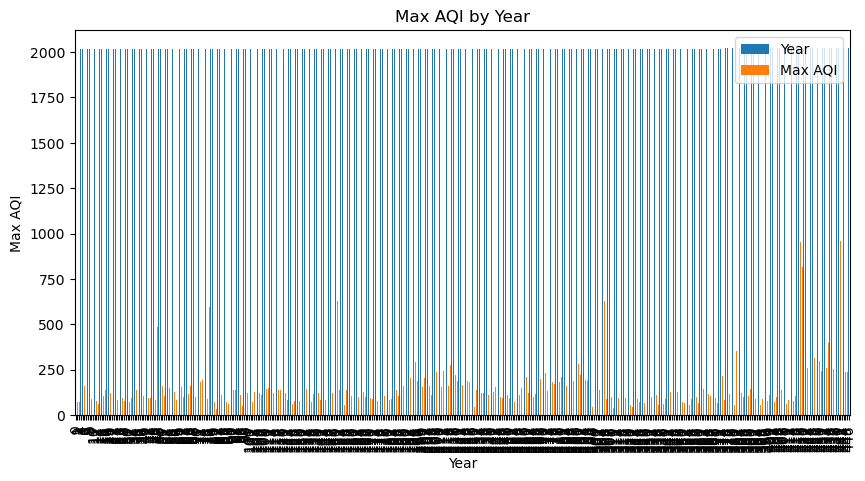

In [39]:
max_AQI_df.plot(kind="bar", figsize=(10,5))
plt.xlabel("Year")
plt.ylabel("Max AQI")
plt.title("Max AQI by Year")
plt.show()

In [43]:
# Create separate dataframes for each sex
ihme_gbd_female_df = ihme_gbd_2015_2020_df[ihme_gbd_2015_2020_df['sex_name'] == 'Female']
ihme_gbd_male_df = ihme_gbd_2015_2020_df[ihme_gbd_2015_2020_df['sex_name'] == 'Male']
ihme_gbd_both_df = ihme_gbd_2015_2020_df[ihme_gbd_2015_2020_df['sex_name'] == 'Both']

# Display the first few rows of each dataframe (optional)
print("Female DataFrame:")
display(ihme_gbd_female_df.head())

print("\nMale DataFrame:")
display(ihme_gbd_male_df.head())

print("\nBoth Sexes DataFrame:")
display(ihme_gbd_both_df.head())

Female DataFrame:


,measure_id,measure_name,location_name,sex_name,cause_name,metric_name,year,val
127,27,Probability of death,Washington,Female,Chronic respiratory diseases,Probability of death,2015,0.083275
130,27,Probability of death,Washington,Female,Pneumoconiosis,Probability of death,2015,0.000034
133,27,Probability of death,Washington,Female,Asthma,Probability of death,2015,0.001744
163,27,Probability of death,New Mexico,Female,Chronic respiratory diseases,Probability of death,2016,0.086789
166,27,Probability of death,New Mexico,Female,Pneumoconiosis,Probability of death,2016,0.000032



Male DataFrame:


,measure_id,measure_name,location_name,sex_name,cause_name,metric_name,year,val
126,27,Probability of death,Washington,Male,Chronic respiratory diseases,Probability of death,2015,0.081303
129,27,Probability of death,Washington,Male,Pneumoconiosis,Probability of death,2015,0.000916
132,27,Probability of death,Washington,Male,Asthma,Probability of death,2015,0.000884
162,27,Probability of death,New Mexico,Male,Chronic respiratory diseases,Probability of death,2016,0.087206
165,27,Probability of death,New Mexico,Male,Pneumoconiosis,Probability of death,2016,0.001012



Both Sexes DataFrame:


,measure_id,measure_name,location_name,sex_name,cause_name,metric_name,year,val
128,27,Probability of death,Washington,Both,Chronic respiratory diseases,Probability of death,2015,0.081966
131,27,Probability of death,Washington,Both,Pneumoconiosis,Probability of death,2015,0.000451
134,27,Probability of death,Washington,Both,Asthma,Probability of death,2015,0.001329
164,27,Probability of death,New Mexico,Both,Chronic respiratory diseases,Probability of death,2016,0.086680
167,27,Probability of death,New Mexico,Both,Pneumoconiosis,Probability of death,2016,0.000512


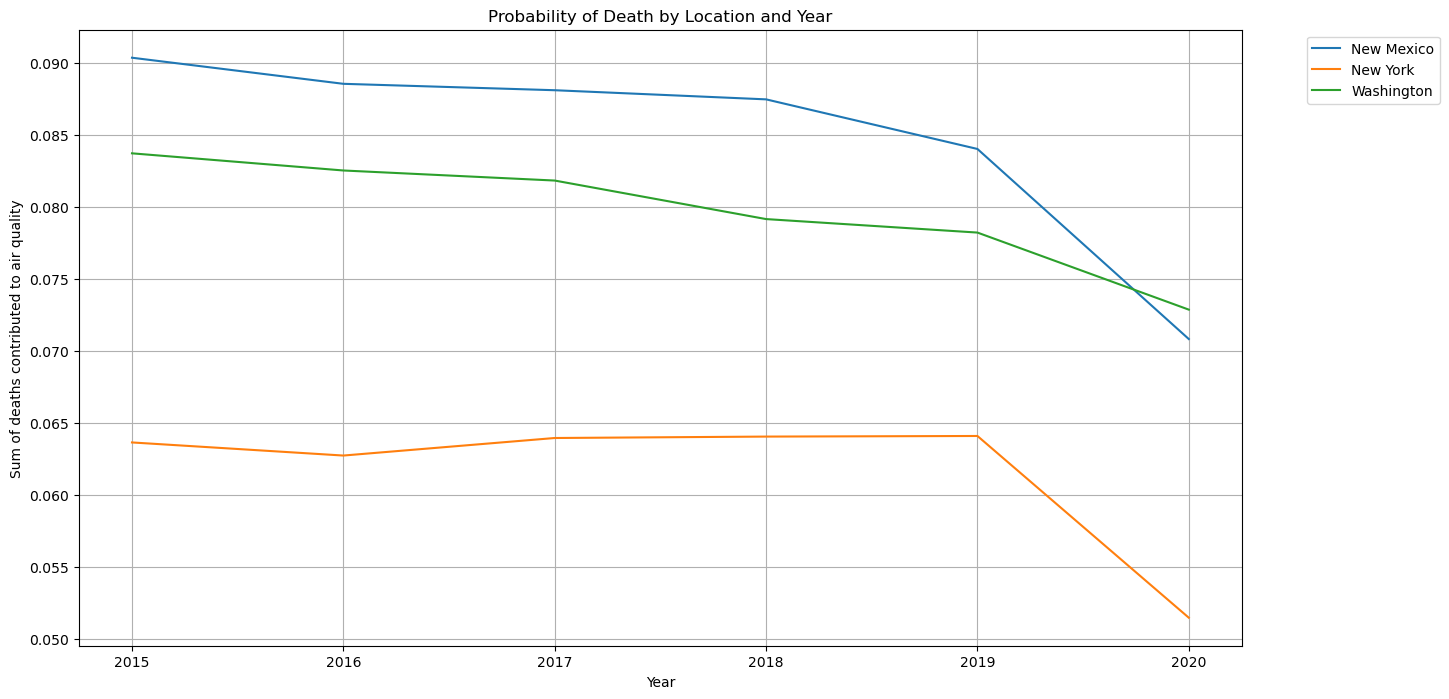

In [44]:
# Group the data by location and year, then calculate the sum of deaths
location_year_deaths = ihme_gbd_both_df.groupby(['location_name', 'year'])['val'].sum().reset_index()

# Create the line plot
plt.figure(figsize=(15, 8))  # Adjust figure size as needed
sns.lineplot(x='year', y='val', hue='location_name', data=location_year_deaths)
plt.title('Probability of Death by Location and Year')
plt.xlabel('Year')
plt.ylabel('Sum of deaths contributed to air quality')
plt.xticks(location_year_deaths['year'].unique()) # Ensure all years are shown on x-axis
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Move the legend outside the plot
plt.grid(True)
plt.show()

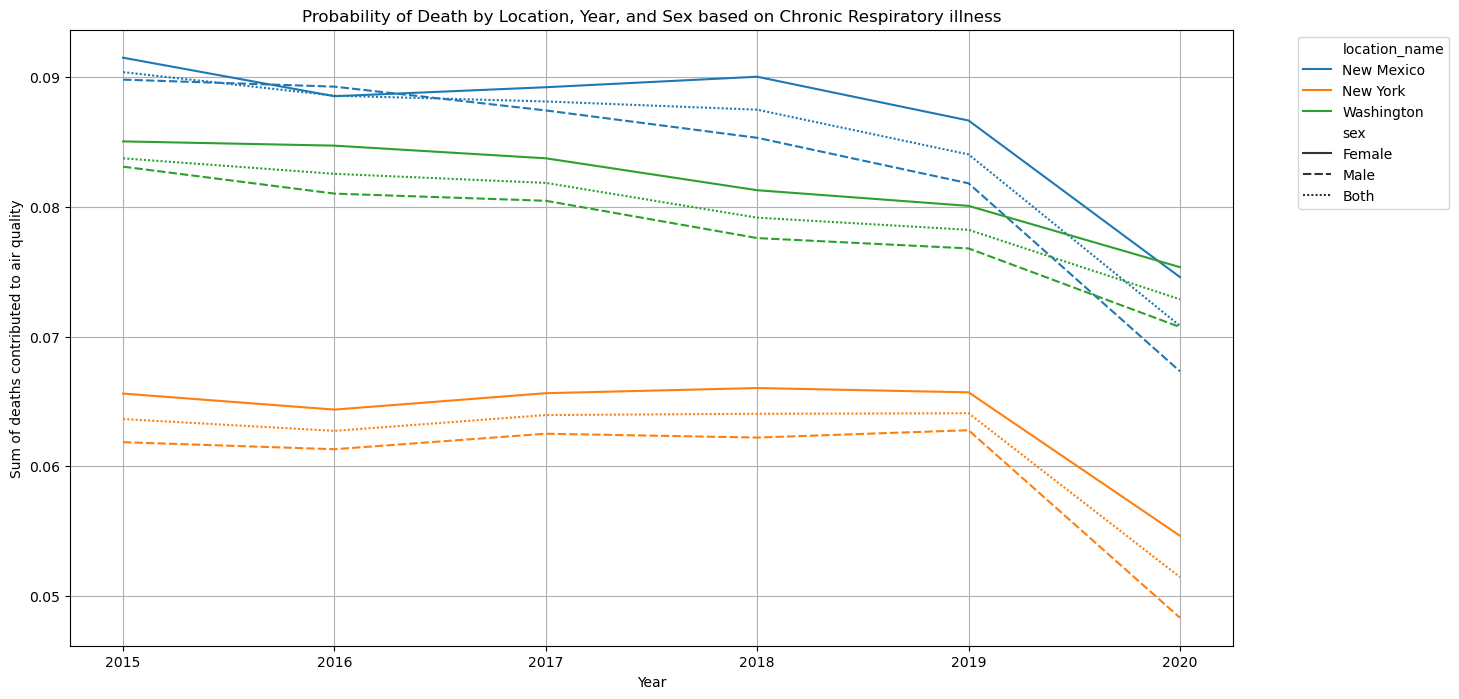

,location_name,year,val_Male,sex_Male,val_Female,sex_Female,disparity
0,New Mexico,2015,0.089815,Male,0.091504,Female,-1.845904
1,New Mexico,2016,0.089274,Male,0.088536,Female,0.833538
2,New Mexico,2017,0.087440,Male,0.089229,Female,-2.005220
3,New Mexico,2018,0.085330,Male,0.090039,Female,-5.229791
4,New Mexico,2019,0.081821,Male,0.086663,Female,-5.586757
5,New Mexico,2020,0.067327,Male,0.074592,Female,-9.740393
6,New York,2015,0.061863,Male,0.065610,Female,-5.709913
7,New York,2016,0.061320,Male,0.064375,Female,-4.746309
8,New York,2017,0.062517,Male,0.065641,Female,-4.758827
9,New York,2018,0.062220,Male,0.066037,Female,-5.779995


In [46]:
# Group data by location and year, then calculate the sum of deaths for each sex
female_deaths = ihme_gbd_female_df.groupby(['location_name', 'year'])['val'].sum().reset_index()
male_deaths = ihme_gbd_male_df.groupby(['location_name', 'year'])['val'].sum().reset_index()
both_deaths = ihme_gbd_both_df.groupby(['location_name', 'year'])['val'].sum().reset_index()

# Add a 'sex' column to each dataframe for plotting
female_deaths['sex'] = 'Female'
male_deaths['sex'] = 'Male'
both_deaths['sex'] = 'Both'

# Combine the dataframes
all_deaths = pd.concat([female_deaths, male_deaths, both_deaths])


# Create the line plot
plt.figure(figsize=(15, 8))
sns.lineplot(x='year', y='val', hue='location_name', style='sex', data=all_deaths)
plt.title('Probability of Death by Location, Year, and Sex based on Chronic Respiratory illness')
plt.xlabel('Year')
plt.ylabel('Sum of deaths contributed to air quality')
plt.xticks(all_deaths['year'].unique())
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Calculate and print the disparity and the percentage difference between male and female deaths for each location and year.

def calculate_disparity(df, sex1, sex2):
    df_sex1 = df[df['sex'] == sex1]
    df_sex2 = df[df['sex'] == sex2]
    merged_df = pd.merge(df_sex1, df_sex2, on=['location_name', 'year'], suffixes=('_' + sex1, '_' + sex2))
    merged_df['disparity'] = (merged_df['val_' + sex1] - merged_df['val_' + sex2]) / merged_df['val_' + sex2] * 100
    return merged_df

disparity_df = calculate_disparity(all_deaths, 'Male', 'Female')

disparity_df

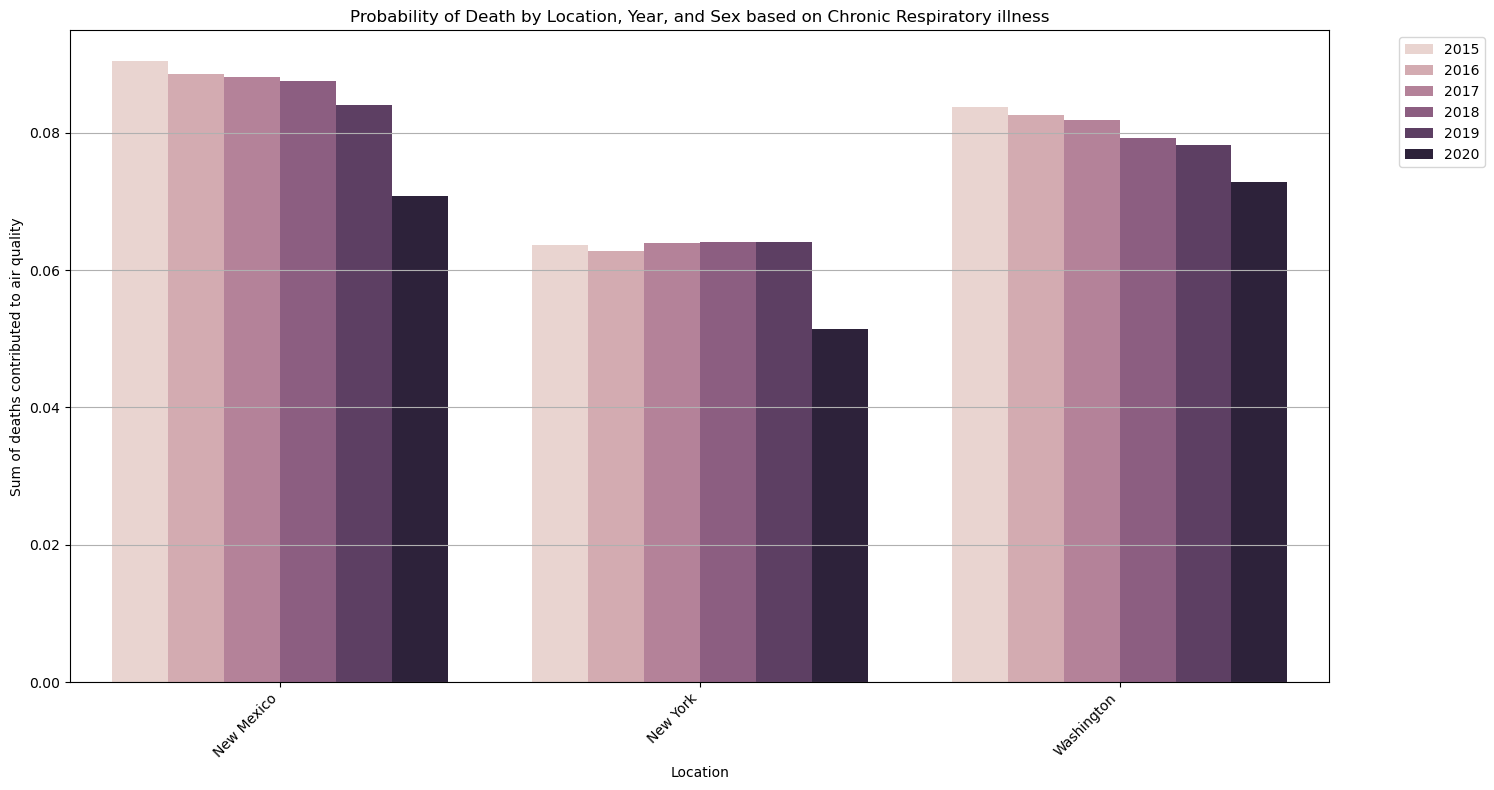

In [45]:
# Assuming location_year_deaths is your dataframe with relevant data
# Group the data by location and year, then calculate the sum of deaths
location_year_deaths = ihme_gbd_both_df.groupby(['location_name', 'year'])['val'].sum().reset_index()

# Create the bar plot
plt.figure(figsize=(15, 8))  # Adjust figure size as needed
sns.barplot(x='location_name', y='val', hue='year', data=location_year_deaths)
plt.title('Probability of Death by Location, Year, and Sex based on Chronic Respiratory illness')
plt.xlabel('Location')
plt.ylabel('Sum of deaths contributed to air quality')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Move the legend outside the plot
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.grid(True, axis='y')
plt.show()